<a href="https://colab.research.google.com/github/Matheusvfvitor/R/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**

Realizar uma an√°lise explorat√≥ria com os dados divulgados pela OMS sobre a evolu√ß√£o do CoVid19 (Corona V√≠rus) no planeta.

**Backaground**

Na √∫ltima ter√ßa-feira(12) a OMS classificou a evolu√ß√£o dos casos de CoVid19 como uma Pandemia, que seria o √∫ltimo est√°gio de prolifera√ß√£o de um v√≠rus quando ele atinge escala global, ou seja presente em todos os continentes.

Com essa an√°lise vamos verificar fatores importantes como por quais regi√µes o v√≠rus se propogou, como est√° a taxa de mortalidade do v√≠rus, e como se deu a evolu√ß√£o do n√∫mero de casos, nos √∫ltimos 20 dias.

**Ferramentas utilizadas**

Para realiza√ß√£o desse trabalho utilizei a linguagem .R , por escolha pessoal, entretanto as mesmas an√°lises poderiam ter sido realidas com a liguagem python.


**Dataset**

O dataset (*.csv) cont√©m os dados at√© o dia 07/03 por isso como a evolu√ß√£o √© di√°ria os dados foram congelados nessa data para an√°lise, contudo devo atualizar esse estudo ao final do m√™s de mar√ßo com os valores atualizados.



---


Vamos l√°....




In [0]:
#Instalando os Pacotes

library(tidyr)
library(dplyr)
library(ggplot2)
library(treemap)
library(maps)


In [30]:
# Lendo os arquivos do dataset
smmy = read.csv("c19_data.csv")

head(smmy)


Province.State Country.Region Lat     Long     Date    Confirmed Deaths
1 Anhui          Mainland China 31.8257 117.2264 1/22/20  1        0     
2 Beijing        Mainland China 40.1824 116.4142 1/22/20 14        0     
3 Chongqing      Mainland China 30.0572 107.8740 1/22/20  6        0     
4 Fujian         Mainland China 26.0789 117.9874 1/22/20  1        0     
5 Gansu          Mainland China 36.0611 103.8343 1/22/20  0        0     
6 Guangdong      Mainland China 23.3417 113.4244 1/22/20 26        0     
  Recovered
1 0        
2 0        
3 0        
4 0        
5 0        
6 0

**Vamos iniciar pela limpeza..**


Em uma an√°lise de dados mais de 50% do trabalho est√° no trabalho de limpeza e captura do banco de dados, como tive sorte esse dataset que encontrei n√£o possui muita coisa a ser ajustada, mesmo assim precisaremos fazer diversas manipula√ß√µes nele para que os resultados sejam os resultados que esperamos.

Vamos come√ßar reduzindo um pouco o tamanho do dataset para essa primeira rodada de an√°lises, retirando os valores de estado (Province.State) , latitude(Lat) e logitude(Long)


Como voc√™ vai verificar no dataset n√£o possui valores NA ou missing, ent√£o nesse caso n√£o teremos muito trabalho para retrabalhar os dados nesse momemnto e podemos come√ßar a manipula√ß√£o para gerar insights

In [31]:
c19 = smmy
c19$Province.State = NULL
c19$Lat = NULL
c19$Long = NULL
str(c19)
summary(c19)

'data.frame':	10350 obs. of  5 variables:
 $ Country.Region: Factor w/ 102 levels "Afghanistan",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Date          : Factor w/ 46 levels "1/22/20","1/23/20",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Confirmed     : int  1 14 6 1 0 26 2 1 4 1 ...
 $ Deaths        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int  0 0 0 0 0 0 0 0 0 0 ...


        Country.Region      Date        Confirmed            Deaths        
 US            :3772   1/22/20: 225   Min.   :    0.00   Min.   :   0.000  
 Mainland China:1426   1/23/20: 225   1st Qu.:    0.00   1st Qu.:   0.000  
 Australia     : 368   1/24/20: 225   Median :    0.00   Median :   0.000  
 Canada        : 276   1/25/20: 225   Mean   :  230.21   Mean   :   6.826  
 Afghanistan   :  46   1/26/20: 225   3rd Qu.:    2.75   3rd Qu.:   0.000  
 Algeria       :  46   1/27/20: 225   Max.   :67666.00   Max.   :2959.000  
 (Other)       :4416   (Other):9000                                        
   Recovered       
 Min.   :    0.00  
 1st Qu.:    0.00  
 Median :    0.00  
 Mean   :   71.24  
 3rd Qu.:    0.00  
 Max.   :43500.00  
                   

Agora vamos agrupar os valores que cont√©m China Mainland e China, por√©m para isso precisamos primeiro alterar os dados de factor para char , caso contr√°rio ele gera um erro.


In [0]:
c19$Country.Region = as.character(c19$Country.Region)
c19[c19$Country.Region =="Mainland China",1] = "China"

In [33]:
c19 = c19 %>% group_by(Date,Country.Region) %>% summarise(Confirmed = sum(Confirmed), Deaths = sum(Deaths), Recovered = sum(Recovered))
c19

Date    Country.Region         Confirmed Deaths Recovered
1    1/22/20 Afghanistan              0        0      0       
2    1/22/20 Algeria                  0        0      0       
3    1/22/20 Andorra                  0        0      0       
4    1/22/20 Argentina                0        0      0       
5    1/22/20 Armenia                  0        0      0       
6    1/22/20 Australia                0        0      0       
7    1/22/20 Austria                  0        0      0       
8    1/22/20 Azerbaijan               0        0      0       
9    1/22/20 Bahrain                  0        0      0       
10   1/22/20 Belarus                  0        0      0       
11   1/22/20 Belgium                  0        0      0       
12   1/22/20 Bhutan                   0        0      0       
13   1/22/20 Bosnia and Herzegovina   0        0      0       
14   1/22/20 Brazil                   0        0      0       
15   1/22/20 Cambodia                 0        0      0       
16   1/22/20 Cameroon                 0        0      0       
17   1/22/20 Canada                   0        0      0       
18   1/22/20 Chile                    0        0      0       
19   1/22/20 China                  547       17     28       
20   1/22/20 Colombia                 0        0      0       
21   1/22/20 Costa Rica               0        0      0       
22   1/22/20 Croatia                  0        0      0       
23   1/22/20 Czech Republic           0        0      0       
24   1/22/20 Denmark                  0        0      0       
25   1/22/20 Dominican Republic       0        0      0       
26   1/22/20 Ecuador                  0        0      0       
27   1/22/20 Egypt                    0        0      0       
28   1/22/20 Estonia                  0        0      0       
29   1/22/20 Faroe Islands            0        0      0       
30   1/22/20 Finland                  0        0      0       
‚ãÆ    ‚ãÆ       ‚ãÆ                      ‚ãÆ         ‚ãÆ      ‚ãÆ        
4663 3/7/20  Philippines               6       1       1      
4664 3/7/20  Poland                    5       0       0      
4665 3/7/20  Portugal                 20       0       0      
4666 3/7/20  Qatar                     8       0       0      
4667 3/7/20  Romania                   9       0       3      
4668 3/7/20  Russia                   13       0       2      
4669 3/7/20  Saint Barthelemy          3       0       0      
4670 3/7/20  San Marino               23       1       0      
4671 3/7/20  Saudi Arabia              5       0       0      
4672 3/7/20  Senegal                   4       0       0      
4673 3/7/20  Serbia                    1       0       0      
4674 3/7/20  Singapore               138       0      78      
4675 3/7/20  Slovakia                  1       0       0      
4676 3/7/20  Slovenia                  7       0       0      
4677 3/7/20  South Africa              1       0       0      
4678 3/7/20  South Korea            7041      44     135      
4679 3/7/20  Spain                   500      10      30      
4680 3/7/20  Sri Lanka                 1       0       1      
4681 3/7/20  Sweden                  161       0       0      
4682 3/7/20  Switzerland             268       1       3      
4683 3/7/20  Taiwan                   45       1      12      
4684 3/7/20  Thailand                 50       1      31      
4685 3/7/20  Togo                      1       0       0      
4686 3/7/20  Tunisia                   1       0       0      
4687 3/7/20  UK                      206       2      18      
4688 3/7/20  Ukraine                   1       0       0      
4689 3/7/20  United Arab Emirates     45       0       7      
4690 3/7/20  US                      417      17       8      
4691 3/7/20  Vatican City              1       0       0      
4692 3/7/20  Vietnam                  18       0      16

Ai est√° o nosso primeiro data_frame para inciar a gera√ß√£o de insights, por√©m antes precisaremos configurar a coluna Date como Date, e n√£o como "char".

Ainda nessa etapa vamos buscar o relat√≥rio com os ultimos dados dispon√≠veis do dataset.

In [34]:
c19$Date = as.character(c19$Date)
c19$Date = as.Date(c19$Date,format = "%m/%d/%Y")
last_date = max(c19$Date)
last = c19[c19$Date == last_date,] ##Report do ultimo dia de refer√™ncia do dataset
day_by_day = c19 %>% group_by(Date) %>% summarise(Confirmed = sum(Confirmed), Deaths = sum(Deaths), Recovered = sum(Recovered)) #Avalia√ßa√µ dia a dia do dataset.

head(last)

head(day_by_day)

Date     Country.Region Confirmed Deaths Recovered
1 20-03-07 Afghanistan     1        0       0       
2 20-03-07 Algeria        17        0       0       
3 20-03-07 Andorra         1        0       0       
4 20-03-07 Argentina       8        0       0       
5 20-03-07 Armenia         1        0       0       
6 20-03-07 Australia      63        2      21

Date     Confirmed Deaths Recovered
1 20-01-22  555      17     28       
2 20-01-23  653      18     30       
3 20-01-24  941      26     36       
4 20-01-25 1434      42     39       
5 20-01-26 2118      56     52       
6 20-01-27 2927      82     61

Em nosso primeiro gr√°fico vamos visualizar a evolu√ß√£o do Covid19 dia a dia Casos confirmados, Recuperados e Ativos


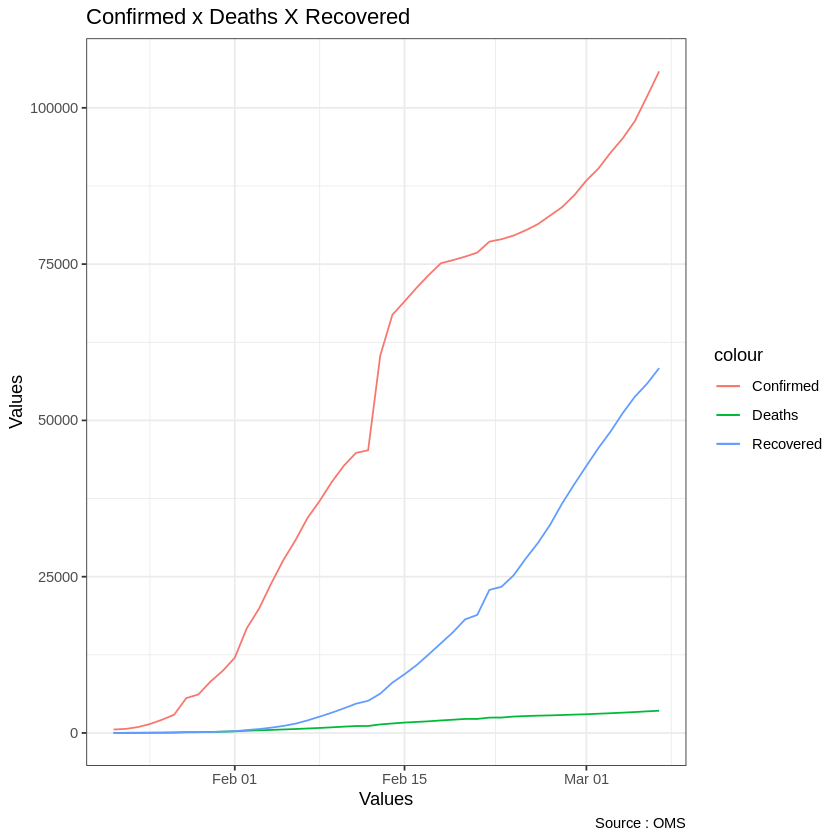

In [35]:
## Evolu√ß√£o do Covid_19 dia a dia
ggplot(day_by_day,aes(x = Date)) +
  geom_line(aes(y = Confirmed, color = "Confirmed"))+
  geom_line(aes(y = Deaths, color = "Deaths"))+
  geom_line(aes(y = Recovered, color = "Recovered"))+
  theme_bw()+
  labs(title = "Confirmed x Deaths X Recovered", y = "Values", x = "Values", caption="Source : OMS" )

Podemos perceber um crescimento vertiginoso do gr√°fico apartir do m√™s de fevereiro,  mas qual o grau de contribui√ß√£o de cada pa√≠s para isso. üò®

Ent√£o vamos analisar os 20 pa√≠ses que mais contribuiram para a quantidade de casos confirmados no √∫ltimo dia

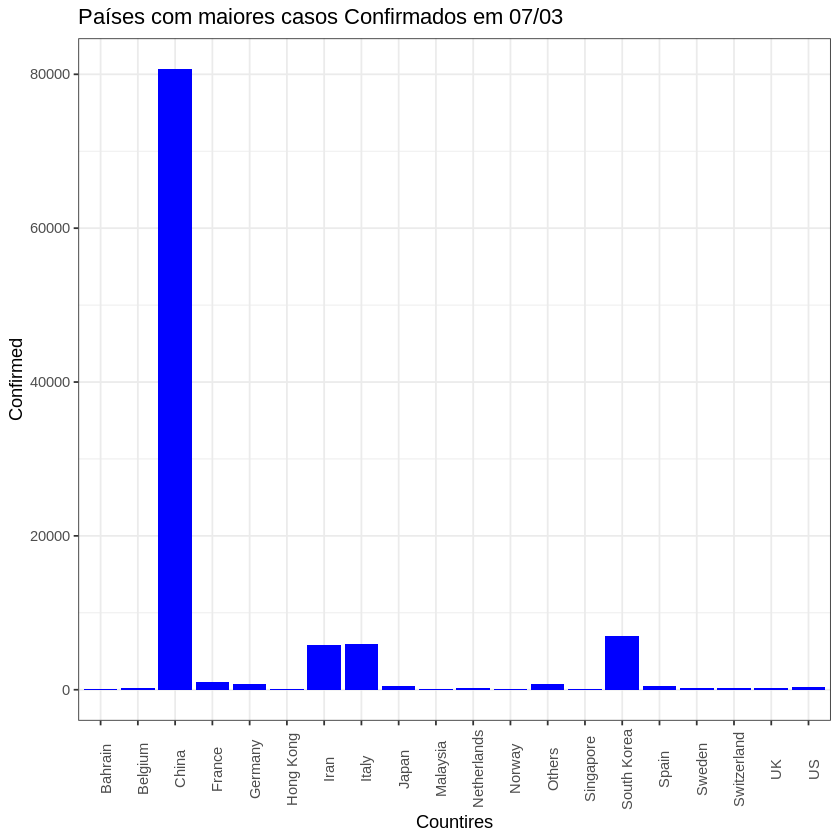

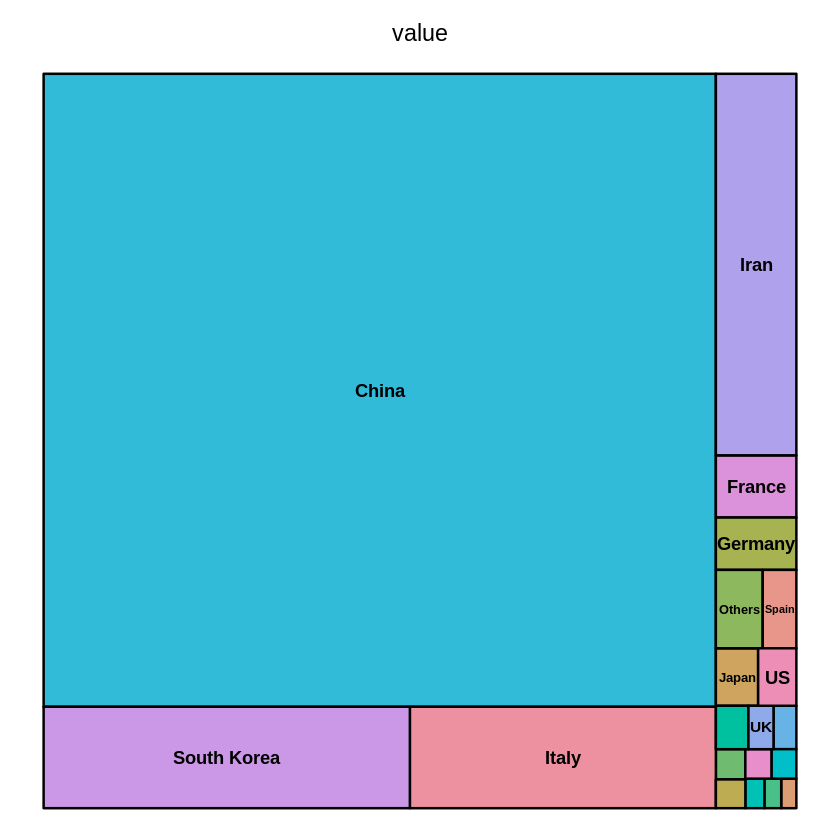

In [60]:
lt = last %>% top_n(20,Confirmed)

ggplot(lt,aes(x = Country.Region, y=Confirmed))+
  geom_col(fill = "blue")+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Pa√≠ses com maiores casos Confirmados em 07/03", y = "Confirmed", x = "Countires")

  group <- lt$Country.Region
value <- lt$Confirmed
data <- data.frame(group,value)

treemap(data,index="group",vSize="value",type="index")

Sem novidades at√© aqui a china √© disparada o pa√≠s com mais casos, o n√∫mero de casos √© t√£o grande que at√© acaba prejudicando a an√°lise e n√£o conseguimos verificar com mais cuidado os outro Top 19, ent√£o vamos avaliar o como est√° o comportamento quando fazemos a avalia√ß√£o sem a China.


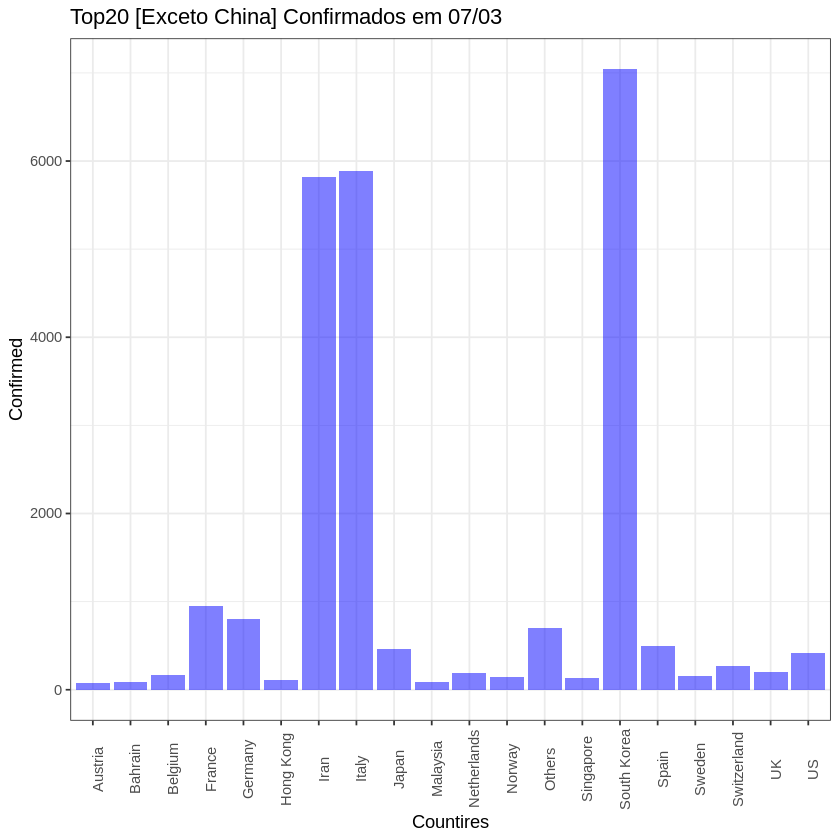

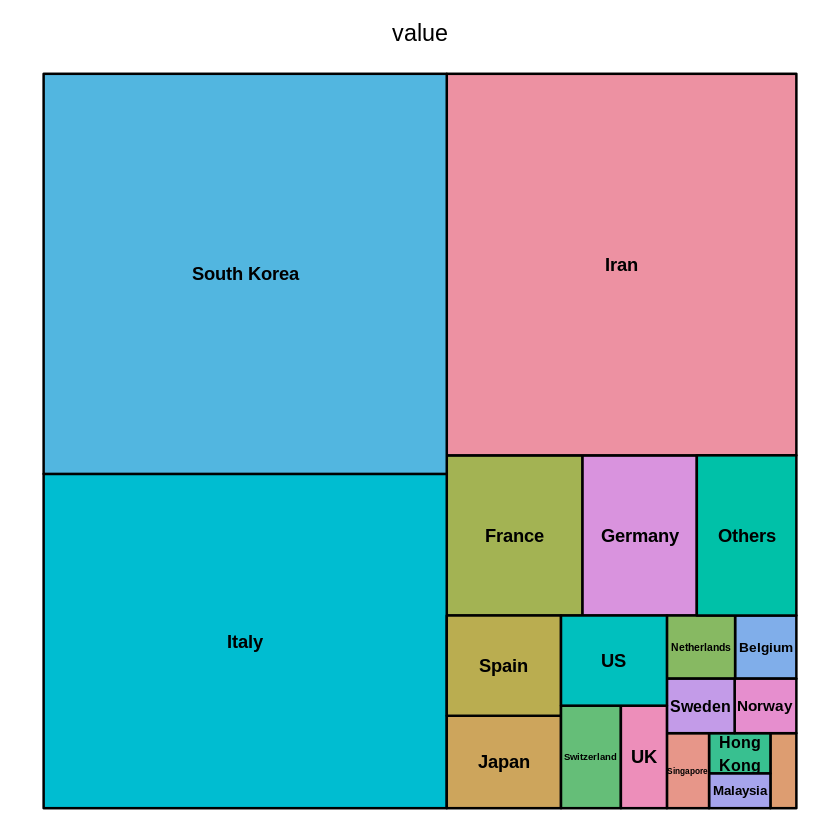

In [66]:
lt_china = last[last$Country.Region != "China",] %>% top_n(20,Confirmed)

ggplot(lt_china,aes(x = Country.Region, y=Confirmed))+
  geom_col(fill = "blue", alpha = 0.5)+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 [Exceto China] Confirmados em 07/03", y = "Confirmed", x = "Countires")

#Treemap
lt_without_China = lt %>% filter(Country.Region != "China")
group <- lt_without_China$Country.Region
value <- lt_without_China$Confirmed
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

Agora que ja conseguimos perceber como est√° o status de casos confirmados vamos expandir um pouco a an√°lise, mas para isso precisaremos manipular o nosso dataset, agrupando colunas em linhas para facilitar a visualiza√ß√£o para isso utilziaremos os pacotes tidyr e dplyr

O que iremos fazer √© agrupar as colunas confirmed, deaths, recovered para uma √∫nica coluna chamada status, isso nos trar√° a possibilidade de agrupar os valores como fatores nos mesmos gr√°ficos facilitando a visualiza√ß√£o

vamos fazer 3 novos data_frames :
1. c19_gather, que trar√° os dados dia por dia
2. lt_gather , que trar√° os dados do ultimo dia dispon√≠vel no dataset (top 20)
3. lt_gather , que trar√° os dados do ultimo dia dispon√≠vel por√©m sem a China (top 19)



In [46]:
c19_gather = gather(last,key="status",value="number",Confirmed,Deaths,Recovered)
lt_gather = gather(lt,key="status",value="number",Confirmed,Deaths,Recovered)
lt_china_gather = gather(lt_china,key="status",value="number",Confirmed,Deaths,Recovered)

head(c19_gather)

head(lt_gather)


head(lt_china_gather)

Date     Country.Region status    number
1 20-03-07 Afghanistan    Confirmed  1    
2 20-03-07 Algeria        Confirmed 17    
3 20-03-07 Andorra        Confirmed  1    
4 20-03-07 Argentina      Confirmed  8    
5 20-03-07 Armenia        Confirmed  1    
6 20-03-07 Australia      Confirmed 63

Date     Country.Region status    number
1 20-03-07 Bahrain        Confirmed    85 
2 20-03-07 Belgium        Confirmed   169 
3 20-03-07 China          Confirmed 80652 
4 20-03-07 France         Confirmed   949 
5 20-03-07 Germany        Confirmed   799 
6 20-03-07 Hong Kong      Confirmed   108

Date     Country.Region status    number
1 20-03-07 Austria        Confirmed  79   
2 20-03-07 Bahrain        Confirmed  85   
3 20-03-07 Belgium        Confirmed 169   
4 20-03-07 France         Confirmed 949   
5 20-03-07 Germany        Confirmed 799   
6 20-03-07 Hong Kong      Confirmed 108

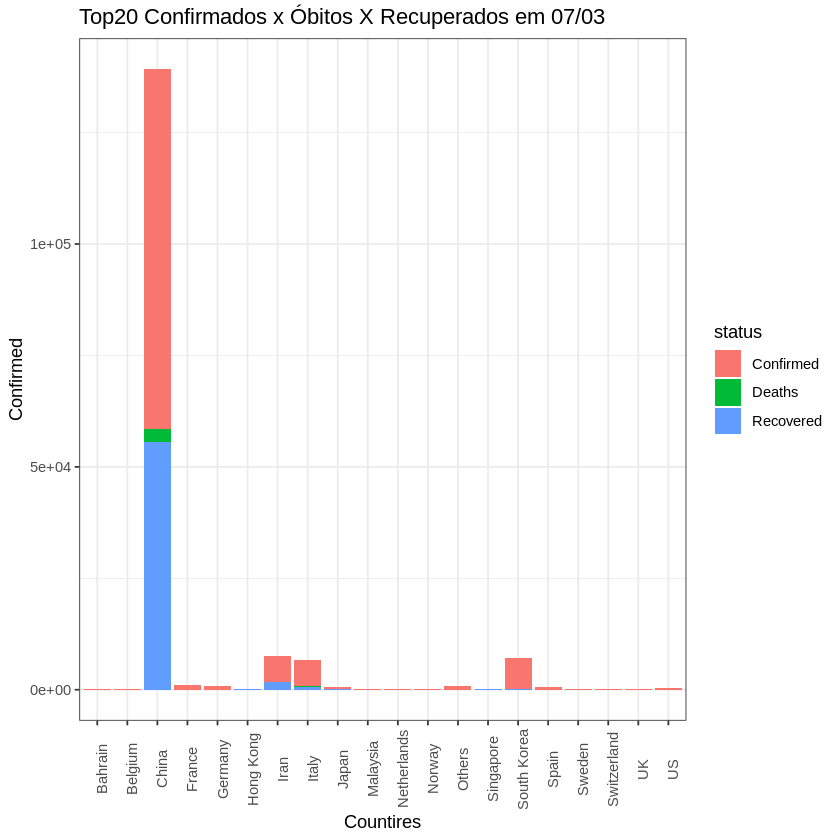

In [51]:
ggplot(lt_gather,aes(x=Country.Region, y=number, fill = status ))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 Confirmados x √ìbitos X Recuperados em 07/03", y = "Confirmed", x = "Countires")

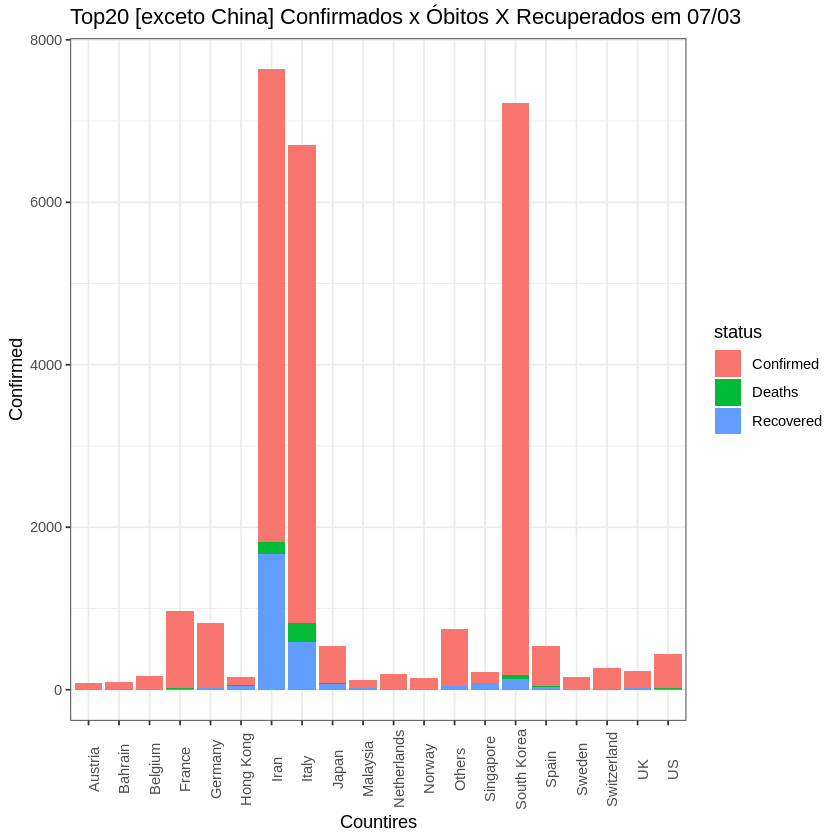

In [54]:
ggplot(lt_china_gather,aes(x=Country.Region, y=number, fill = status ))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 [exceto China] Confirmados x √ìbitos X Recuperados em 07/03", y = "Confirmed", x = "Countires")

Avaliando os dois gr√°ficos acima podemos perceber que apesar da contamina√ß√£o ser muito f√°cil e r√°pida o n√∫mero de casos de √≥bito √© baixo com rela√ß√£o aos infectados, ainda pode-se notar que n√£o h√° rela√ß√£o proporcial entre o n√∫mero de infectados e o de √≥bitos (vamos continuar explorando mais abaixo).

Como podemos ver a taxa de mortalidade da It√°lia √© maior do que a taxa de mortalidade do iran, veremos em mais detalhes nas pr√≥ximas etapas. Isso se d√° devido o fato de a It√°lia possuir uma quantidade de idosos em circula√ß√£o muito maior do que no Iran por exemplo. A it√°lia √© destino frequente de aposentados para passar as f√©rias. Al√©m disso mais de 15% da popula√ß√£o europeia tem mais de 50 anos.
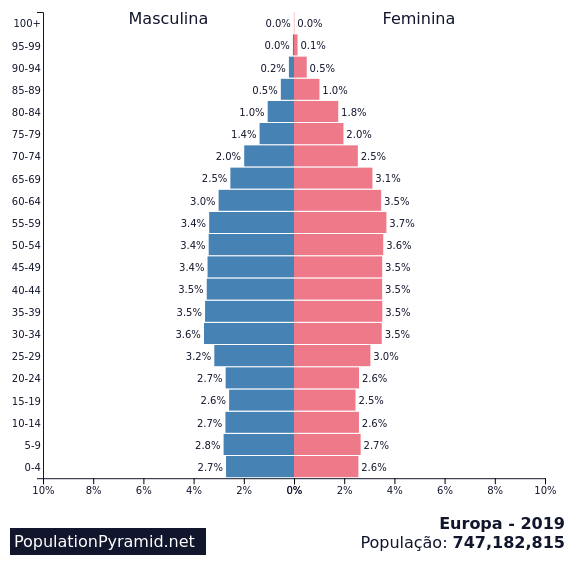

*n√£o encontrei um dataset com a idade dos infectados ent√£o, n√£o ser√° poss√≠vel comprovar nesse estudo essa rela√ß√£o (√≥bitos, x idade dos infectados), entretanto ela ja foi comprovada em outros estudos vide a mat√©ria abaixo.

https://www.bbc.com/portuguese/brasil-51539986

Em pr√≥ximos estudos futuros irei realizar uma avalia√ß√£o mais profunda sobre a rela√ß√£o dos infectados com a faixa et√°ria e os demais epis√≥dios de epidemia como (H1N1, Ebola etc).


Agora vamos aprofundar a an√°lise na taxa de mortalidade do v√≠rus ou seja , a quantidade de √≥bitos por casos confirmados.

Nessa avalia√ß√£o podemos verificar que a taxa de mortalidade gira entre 2,5 e 3,0 %. Podemos verificar alguns pa√≠ses como o Paquist√£o e San Marino que possuem n√∫mero de casos extremamente baixo.

Gostaria de destacar It√°lia e USA, s√£o pa√≠ses com a taxa de mortalidade extremamente alta pr√≥xima de 4,0%.

A demora na ado√ß√£o de medidas mais dr√°sticas de controle epidomol√≥gico, higiene e controle influencia de maneira negativa auxiliando o r√°pido avan√ßo dos casos.

Podemos ver o exemplo positivo da Coreia do Sul que apesar do pa√≠s ser um dos mais infectados a taxa de mortaldiade do v√≠rus n√£o chega a 1%. Isso se d√° devido a medidas de seguran√ßa, higiene e controle epidemol√≥gico adotados pelo pa√≠s que est√£o sendo muito bem sucedidos no controle do v√≠rus.

Date     Country.Region Confirmed Deaths Recovered Mortality 
1  20-03-07 Australia         63        2      21      3.1746032
2  20-03-07 China          80652     3070   55478      3.8064772
3  20-03-07 France           949       11      12      1.1591149
4  20-03-07 Hong Kong        108        2      51      1.8518519
5  20-03-07 Iran            5823      145    1669      2.4901254
6  20-03-07 Iraq              54        4       0      7.4074074
7  20-03-07 Italy           5883      233     589      3.9605643
8  20-03-07 Japan            461        6      76      1.3015184
9  20-03-07 Netherlands      188        1       0      0.5319149
10 20-03-07 Others           696        6      40      0.8620690
11 20-03-07 Philippines        6        1       1     16.6666667
12 20-03-07 San Marino        23        1       0      4.3478261
13 20-03-07 South Korea     7041       44     135      0.6249112
14 20-03-07 Spain            500       10      30      2.0000000
15 20-03-07 Switzerland      268        1       3      0.3731343
16 20-03-07 Taiwan            45        1      12      2.2222222
17 20-03-07 Thailand          50        1      31      2.0000000
18 20-03-07 UK               206        2      18      0.9708738
19 20-03-07 US               417       17       8      4.0767386

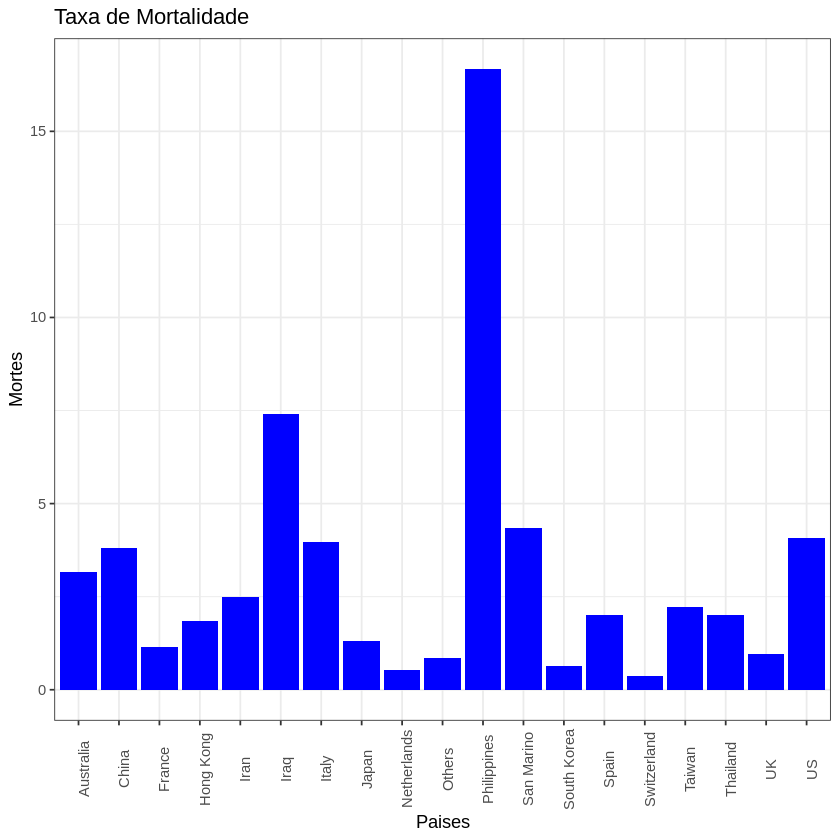

In [71]:
lt_deaths = last[last$Deaths>=1,]

lt_deaths = lt_deaths %>% mutate(Mortality = (Deaths/Confirmed)*100)

lt_deaths

ggplot(lt_deaths, aes(x = Country.Region, y = Mortality))+
  geom_col(fill = "blue")+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Taxa de Mortalidade", y = "Mortes", x = "Paises")

Agora avaliando os n√∫meros absolutos de √≥bitos do Corona V√≠rus, com e sem a China


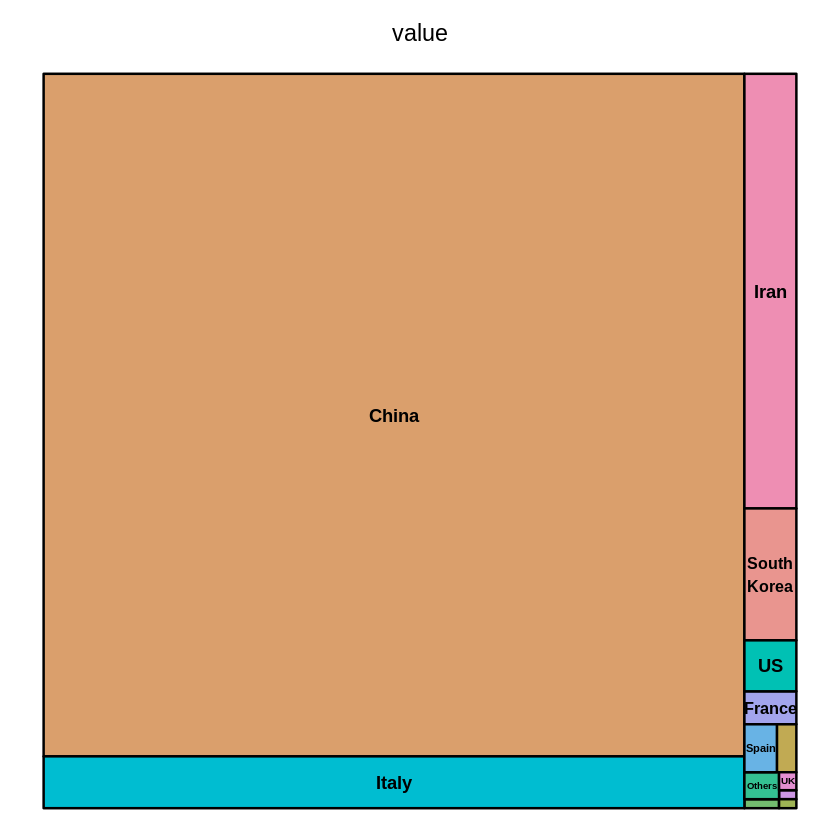

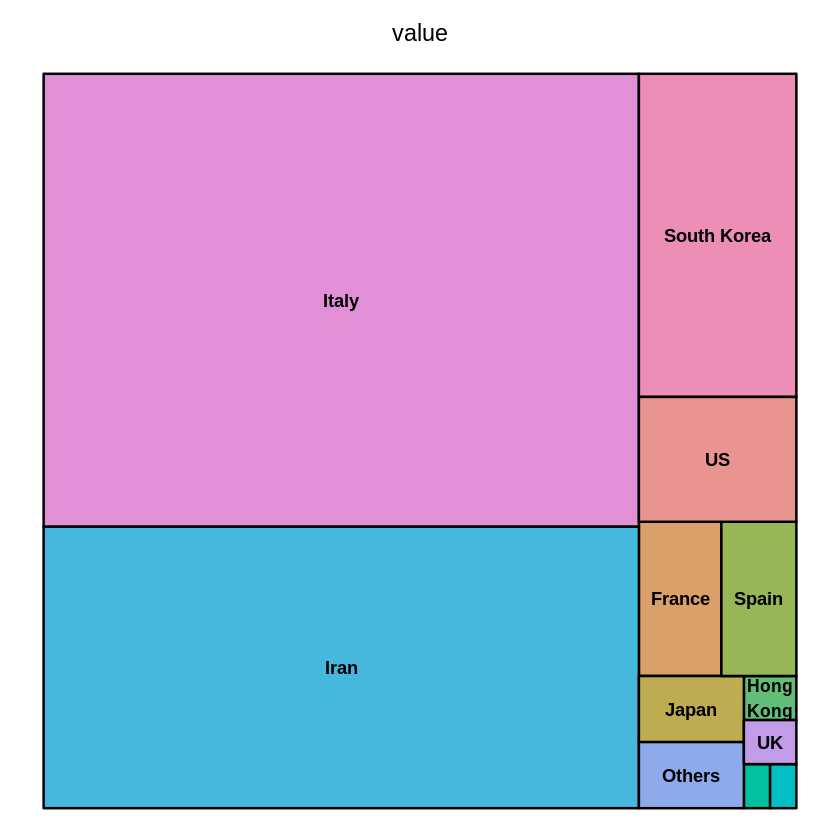

In [70]:
group <- lt$Country.Region
value <- lt$Deaths
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

##Deaths Without China
lt_without_China = lt %>% filter(Country.Region != "China")
group <- lt_without_China$Country.Region
value <- lt_without_China$Deaths
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

**Vamos avaliar a evolu√ß√£o dos casos do Covid_19 ao longo do tempo**



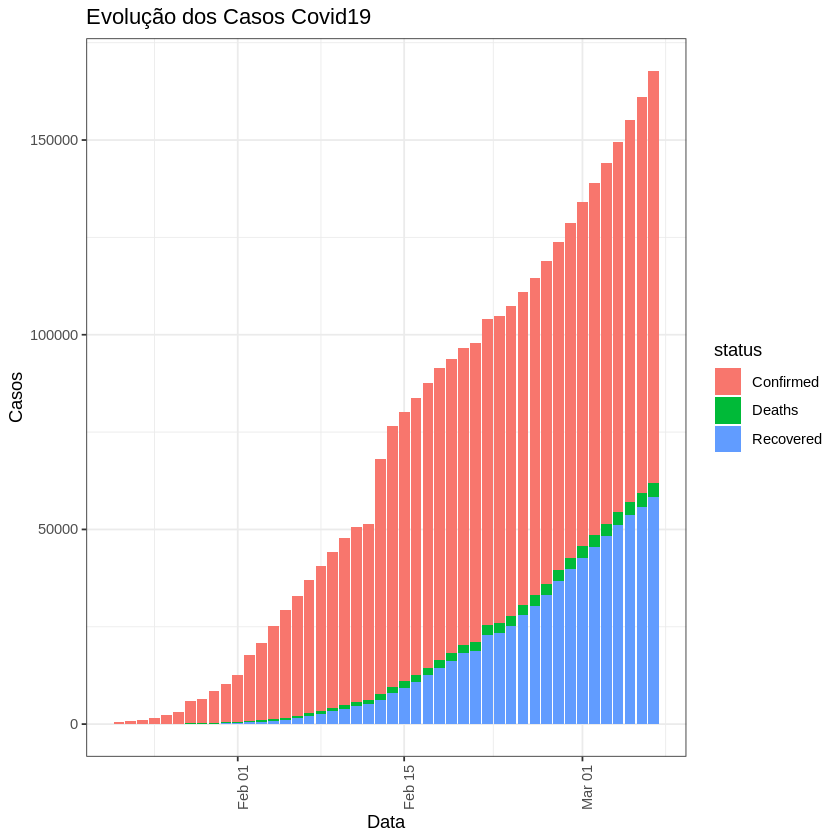

In [74]:
data = c19 %>% gather(key ="status",value="value",Confirmed,Deaths,Recovered)
data = data %>% filter(value >0)

ggplot(data, aes(x = Date , y = value, fill= status))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Evolu√ß√£o dos Casos Covid19", y = "Casos", x = "Data")

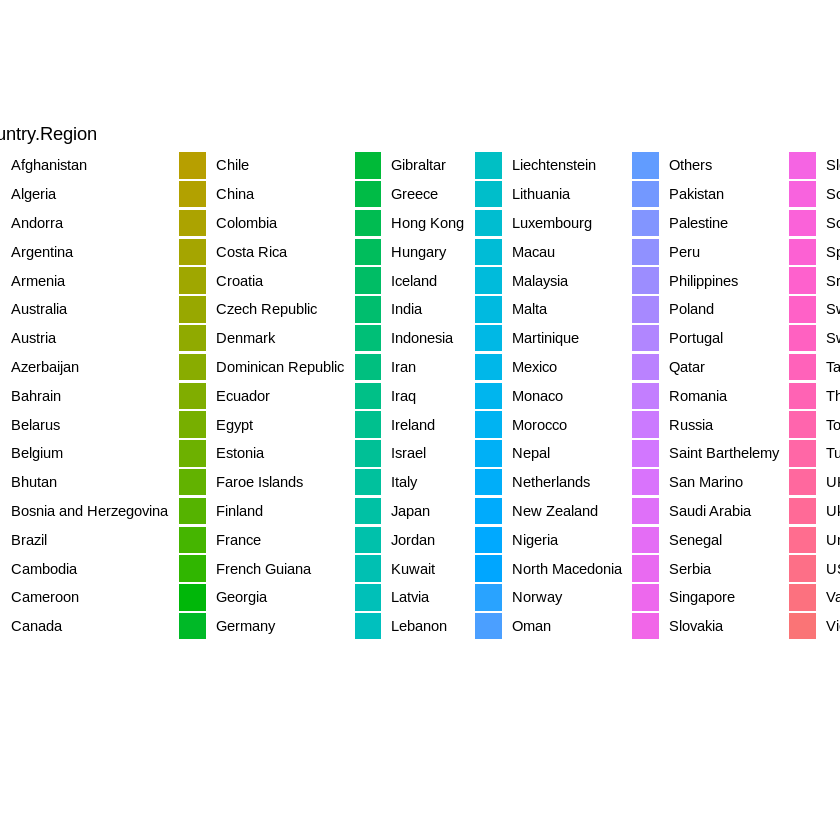

In [75]:
ggplot(data, aes(x = Date , y = value, fill= Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))